## Data Understanding

### Import Dataset 

In [1]:
import pandas as pd
data = pd.read_csv('bank-full.csv', sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Data Exploration

In [2]:
#Check data dimension
print("Ukuran data: {}".format(data.shape))

Ukuran data: (45211, 17)


In [3]:
#Check missing value
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [4]:
#Data Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Statistic Descriptive Analysis of Data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [6]:
#Import Plotting Libraries
import matplotlib.pyplot as plt
import seaborn as sns

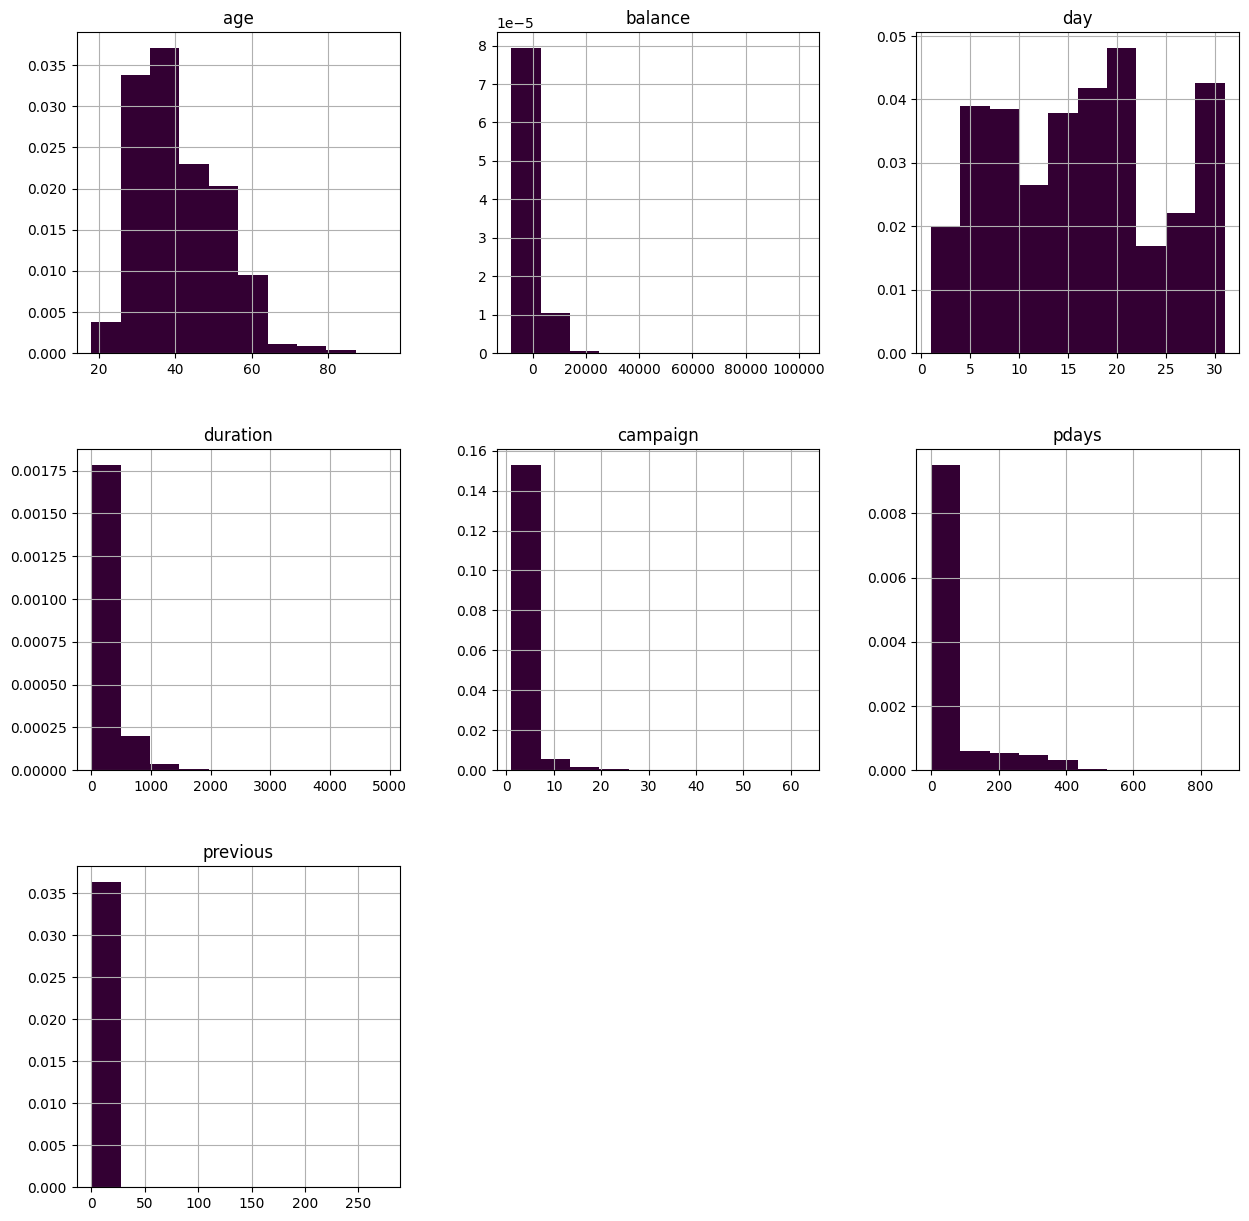

In [7]:
data.hist(figsize=(15,15), density=True, color="#330033")
plt.show()

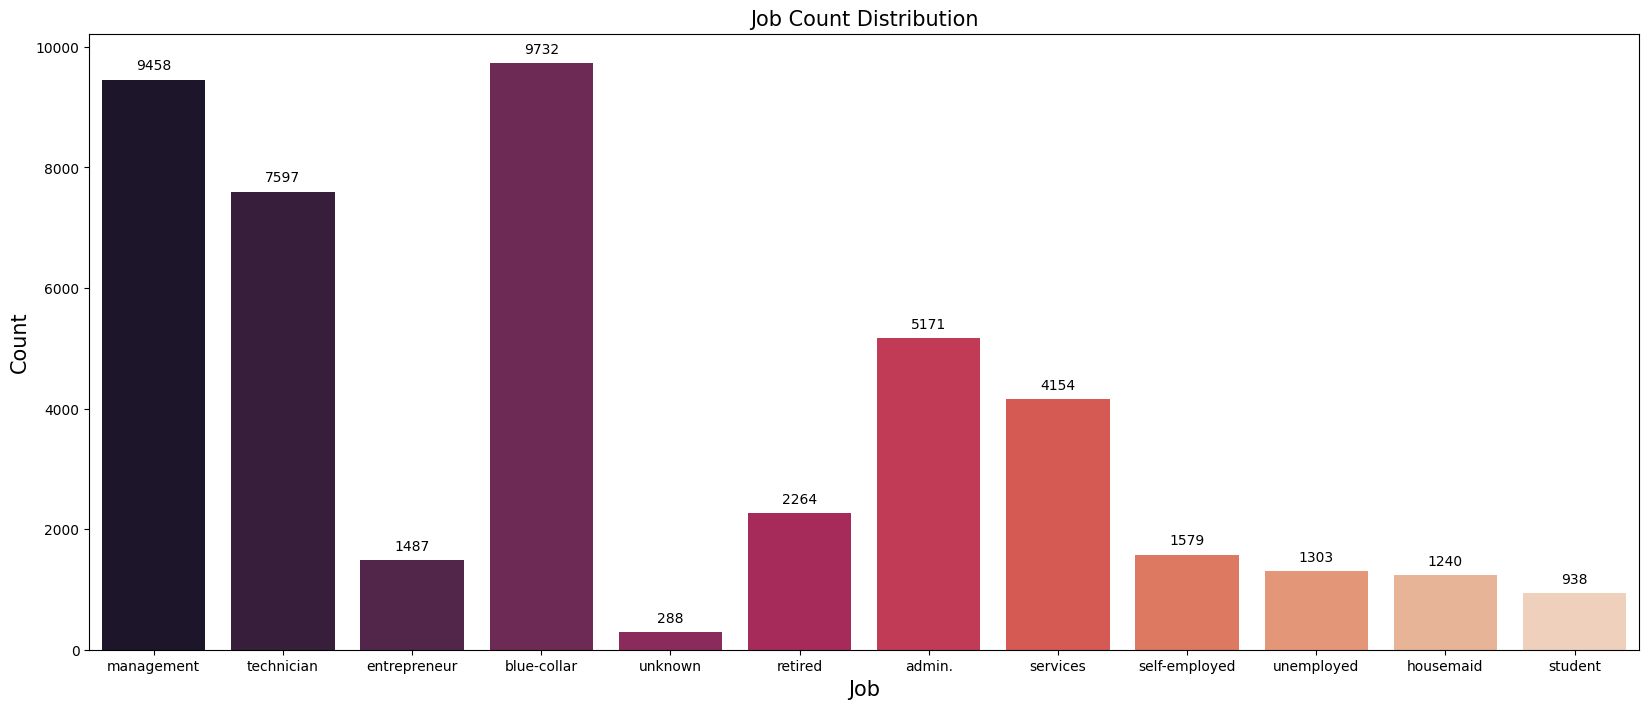

In [8]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.countplot(x = 'job', data=data, palette="rocket")
ax.set_xlabel('Job', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
ax.set_title('Job Count Distribution', fontsize = 15)
ax.tick_params
for rect in ax.patches:
    height = rect.get_height()
    ax.annotate(f'{int(height)}', xy=(rect.get_x()+rect.get_width()/2, height), 
                xytext=(0, 5), textcoords='offset points', ha='center', va='bottom') 

Text(29.999999999999986, 0.5, 'Count')

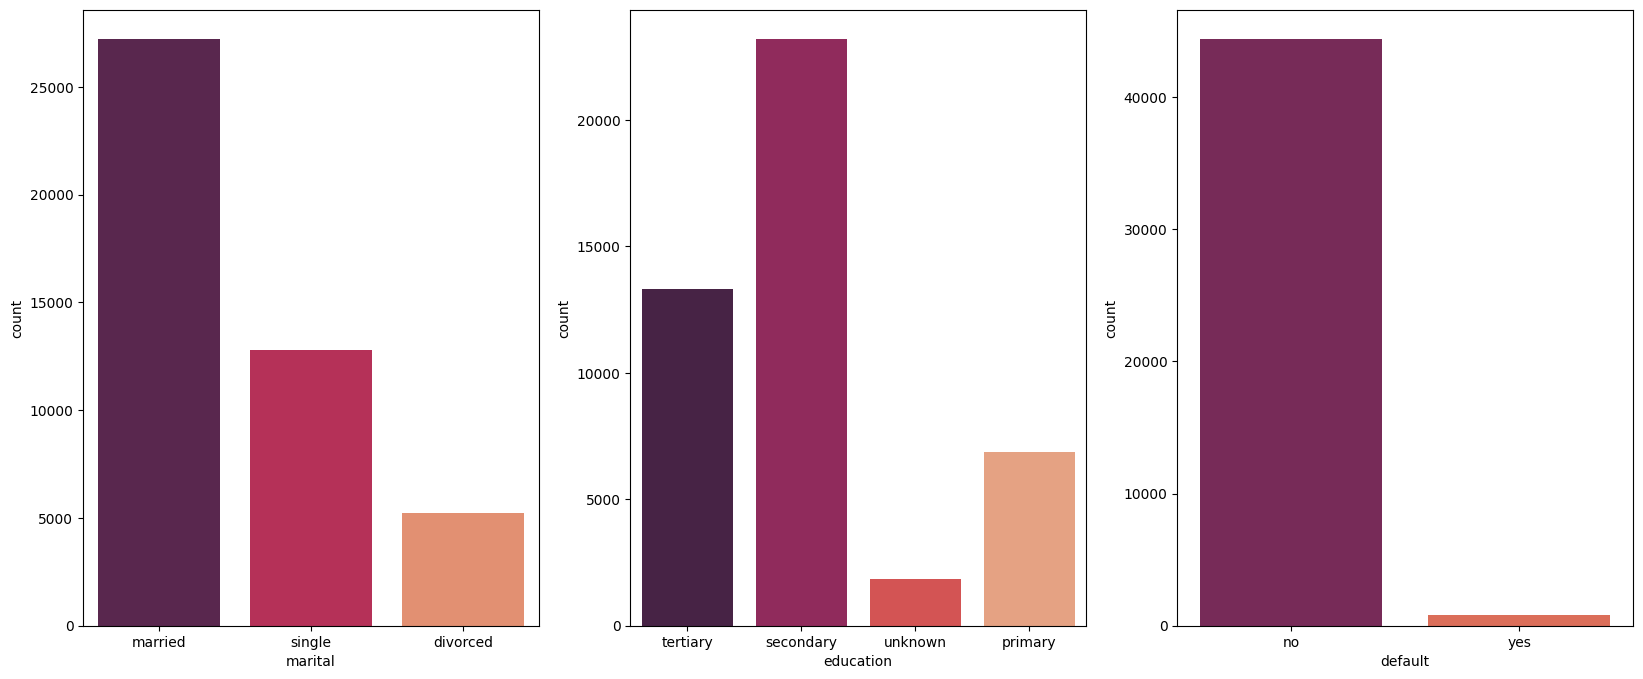

In [9]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(20, 8)
sns.countplot(x = 'marital', data=data, palette="rocket", ax=axs[0])
sns.countplot(x = 'education', data=data, palette="rocket", ax=axs[1])
sns.countplot(x = 'default', data=data, palette="rocket", ax=axs[2])
ax.set_ylabel('Count', fontsize = 15)

Text(29.999999999999986, 0.5, 'Count')

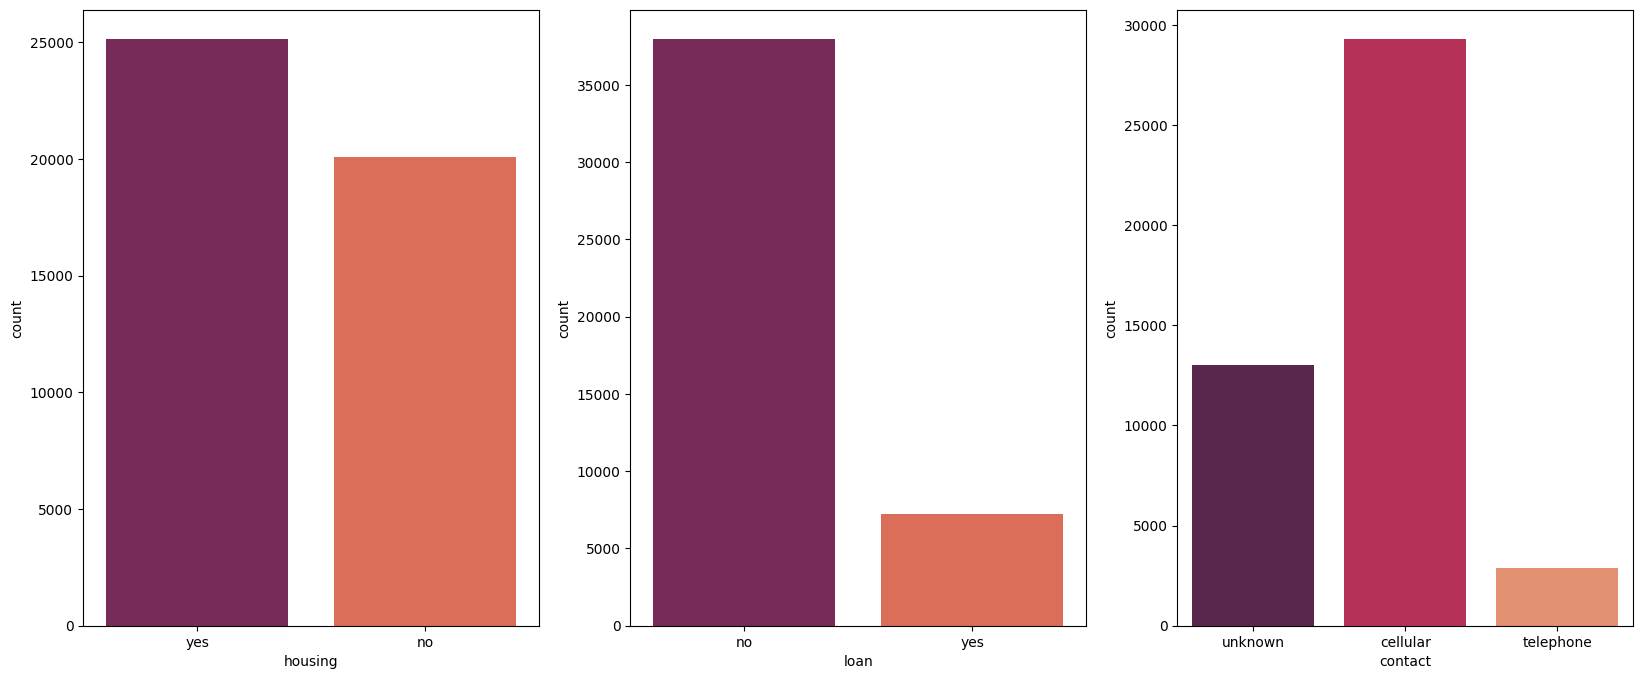

In [10]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(20, 8)
sns.countplot(x = 'housing', data=data, palette="rocket", ax=axs[0])
sns.countplot(x = 'loan', data=data, palette="rocket", ax=axs[1])
sns.countplot(x = 'contact', data=data, palette="rocket", ax=axs[2])
ax.set_ylabel('Count', fontsize = 15)

Text(29.999999999999986, 0.5, 'Count')

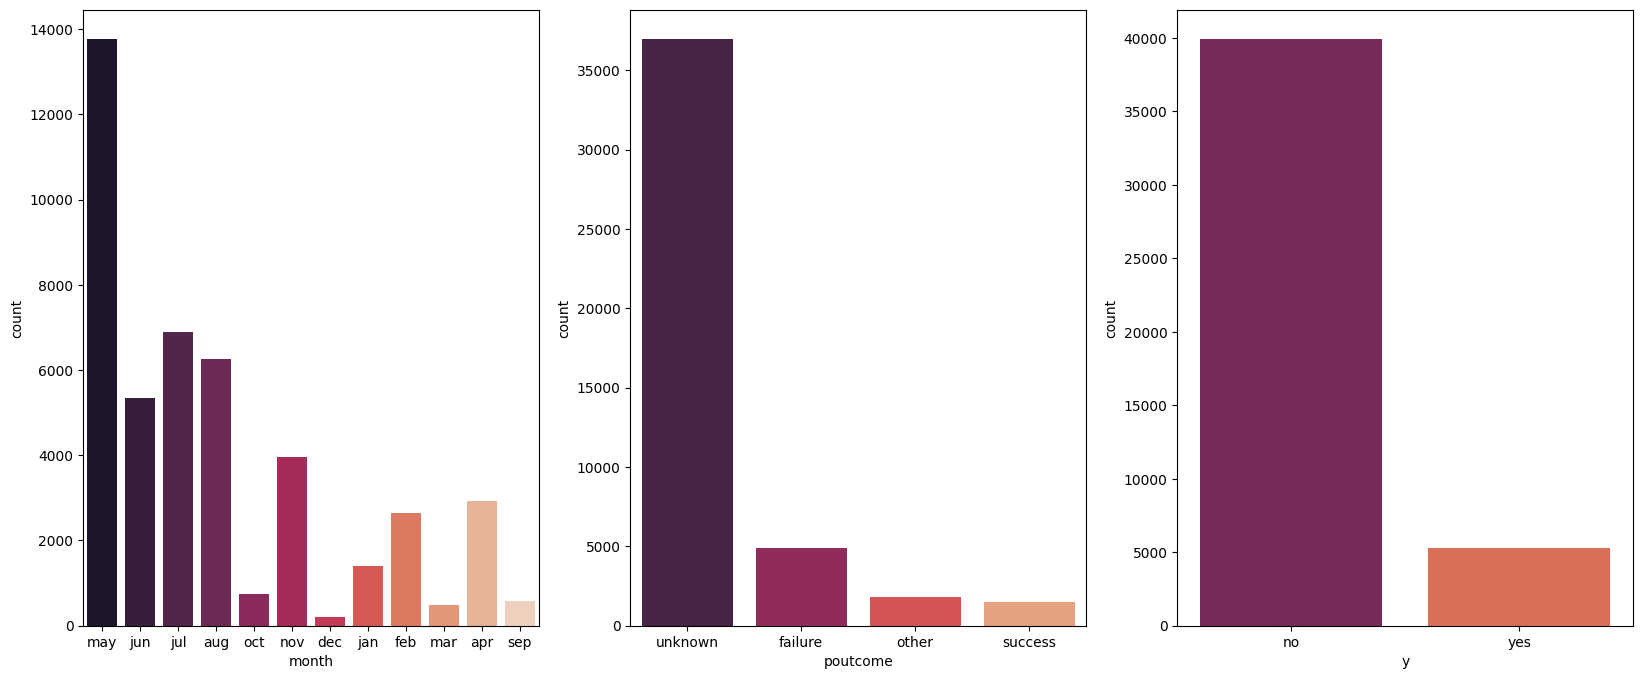

In [11]:
fig, axs = plt.subplots(ncols=3)
fig.set_size_inches(20, 8)
sns.countplot(x = 'month', data=data, palette="rocket", ax=axs[0])
sns.countplot(x = 'poutcome', data=data, palette="rocket", ax=axs[1])
sns.countplot(x = 'y', data=data, palette="rocket", ax=axs[2])
ax.set_ylabel('Count', fontsize = 15)

## Data Preparation

### Label Encoding

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data = data.apply(le.fit_transform)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0


## Modeling

### Data Splitting

In [13]:
from sklearn.model_selection import train_test_split
X = data.drop(['y'], axis=1)
y = data['y']

X_train, X_test, y_train, y_test =\
    train_test_split (X, y,
                     test_size = 0.3,
                     random_state = 0,
                     stratify=y)

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (31647, 16)
y_train shape: (31647,)
X_test shape: (13564, 16)
y_test shape: (13564,)


### Decision Tree Model

In [14]:
from sklearn.tree import DecisionTreeClassifier
clf_DT = DecisionTreeClassifier(criterion="gini", max_depth=5,
                                min_samples_split=4, min_samples_leaf=2)
model_DT = clf_DT.fit(X_train, y_train)
predict_DT = model_DT.predict(X_test)
print("Test prediction: {}".format(predict_DT))

Test prediction: [0 0 0 ... 0 0 0]


In [15]:
df_DT = pd.concat([y_test, pd.Series(predict_DT, name='Predicted_y')], axis=1)
df_DT.dropna(axis=0, inplace=True)
df_DT.tail()

,y,Predicted_y
6625,0.0,0.0
12918,0.0,0.0
7896,0.0,0.0
7379,1.0,0.0
10774,0.0,0.0


In [16]:
#Feature Selection
feature_names = data[['age','job','marital','education','default','balance',
                             'housing','loan','contact','day',
                             'month','duration','campaign','previous',
                             'poutcome','pdays']]

In [ ]:
#Decision tree building
from sklearn.tree import export_graphviz
export_graphviz(model_DT, out_file="tree.dot", class_names=["yes", "no"],
               feature_names=feature_names.columns.values, impurity=False, filled=True)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

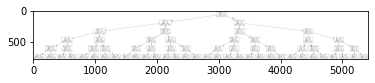

In [ ]:
from sklearn import tree
import pydotplus
import matplotlib.image as pltimg
import matplotlib.pyplot as plt

data_tree = tree.export_graphviz(model_DT, out_file=None, feature_names=feature_names.columns.values)
graph = pydotplus.graph_from_dot_data(data_tree)
graph.write_png('00000027615-TaniaCiu_DecisionTree.png')

img=pltimg.imread('00000027615-TaniaCiu_DecisionTree.png')
imgplot = plt.imshow(img)
plt.show() 

### K-Nearest Neighbors Model

In [19]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=3, weights='distance')
model_KNN = clf_KNN.fit(X_train, y_train)
predict_KNN = model_KNN.predict(X_test)
print("Test prediction: {}".format(predict_KNN))

Test prediction: [0 0 0 ... 0 0 0]


In [20]:
#Prediction probability
print("Prediction probability: {}".format(model_KNN.predict_proba(X_test)))

Prediction probability: [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [21]:
df_KNN = pd.concat([y_test, pd.Series(predict_KNN, name='Predicted_y')], axis=1)
df_KNN.dropna(axis=0, inplace=True)
df_KNN.tail()

,y,Predicted_y
6625,0.0,0.0
12918,0.0,0.0
7896,0.0,0.0
7379,1.0,0.0
10774,0.0,0.0


### Support Vector Machine Model

In [22]:
# Supress warnings
import warnings
warnings.filterwarnings('ignore')

In [23]:
from sklearn.svm import LinearSVC
clf_SVM = LinearSVC(max_iter=100000, class_weight='balanced', random_state=0)
model_SVM = clf_SVM.fit(X_train, y_train)
predict_SVM = model_SVM.predict(X_test)
print("Test prediction: {}".format(predict_SVM))

In [ ]:
df_SVM = pd.concat([y_test, pd.Series(predict_SVM, name='Predicted_y')], axis=1)
df_SVM.dropna(axis=0, inplace=True)
df_SVM.tail()

,y,Predicted_y
13550,0.0,0.0
13553,0.0,0.0
13559,0.0,0.0
13560,0.0,0.0
13563,0.0,0.0


## Evaluation

### Evaluation Model Function

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def metrics(y_true, y_pred):
    print('Accuracy: %.4f' % accuracy_score(y_true, y_pred))
    print('Precision: %.4f' % precision_score(y_true, y_pred))
    print('Recall: %.4f' % recall_score(y_true, y_pred))
    print('F1 Score: %.4f' % f1_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))

    cm = confusion_matrix(y_true, y_pred)
    cm = pd.DataFrame(cm, [1,2], [1,2])

    sns.heatmap(cm, annot=True, fmt="d")
    plt.show()

### Evaluation of Decision Tree Model

Accuracy: 0.8945
Precision: 0.5880
Recall: 0.3283
F1 Score: 0.4214
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     11977
           1       0.59      0.33      0.42      1587

    accuracy                           0.89     13564
   macro avg       0.75      0.65      0.68     13564
weighted avg       0.88      0.89      0.88     13564



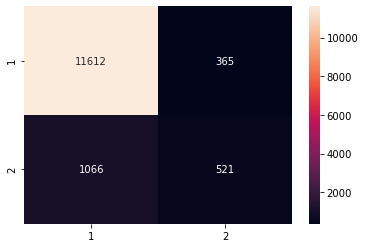

In [ ]:
metrics(y_test, predict_DT)

### Evaluation of K-Nearest Neighbor Model

Accuracy: 0.8795
Precision: 0.4789
Recall: 0.3359
F1 Score: 0.3948
              precision    recall  f1-score   support

           0       0.92      0.95      0.93     11977
           1       0.48      0.34      0.39      1587

    accuracy                           0.88     13564
   macro avg       0.70      0.64      0.66     13564
weighted avg       0.86      0.88      0.87     13564



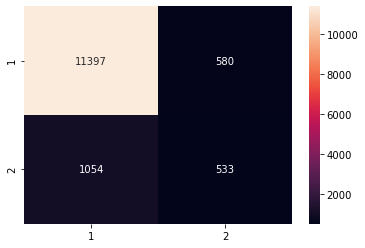

In [ ]:
metrics(y_test, predict_KNN)

### Evaluation of Support Vector Machine Model

Accuracy: 0.8882
Precision: 0.6127
Recall: 0.1216
F1 Score: 0.2029
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     11977
           1       0.61      0.12      0.20      1587

    accuracy                           0.89     13564
   macro avg       0.75      0.56      0.57     13564
weighted avg       0.86      0.89      0.85     13564



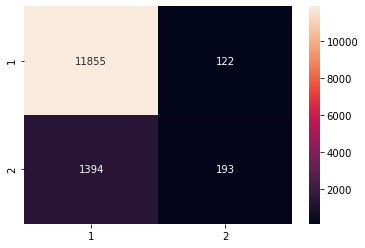

In [ ]:
metrics(y_test, predict_SVM)

### Model Comparison

In [ ]:
import numpy as np
def perf_measure(y_actual, y_hat):
    y_actual=np.array(y_actual)
    y_hat=np.array(y_hat)
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i] and y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

In [ ]:
classifiers=[]
classifiers.append(('DT',clf_DT))
classifiers.append(('KNN',clf_KNN))
classifiers.append(('SVM',clf_SVM))

result=[]
cnf_matric_parameter=[]
for i,v in classifiers:
    pred=v.predict(X_test)
    acc=accuracy_score(y_test,pred)
    precision = precision_score(y_test,pred)
    recall=recall_score(y_test, pred)
    f_measure=f1_score(y_test,pred)
    result.append((i,acc,precision,recall,f_measure))

    TP,FP,TN,FN=perf_measure(y_test,pred)
    cnf_matric_parameter.append((i,TP,FP,TN,FN))

In [ ]:
column_names=['Algorithm','Accuracy','Precision','Recall','F1-score']
df1=pd.DataFrame(result,columns=column_names)
df1

,Algorithm,Accuracy,Precision,Recall,F1-score
0,DT,0.894500,0.588036,0.328292,0.421351
1,KNN,0.879534,0.478886,0.335854,0.394815
2,SVM,0.888234,0.612698,0.121613,0.202944


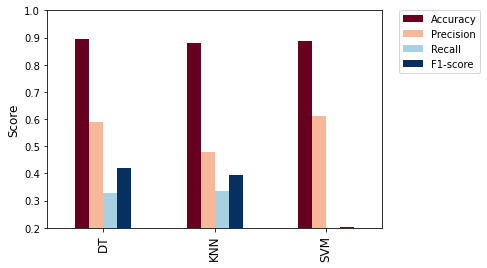

In [ ]:
df1.plot(kind='bar', ylim=(0.2,1.0), align='center', colormap="RdBu")
plt.xticks(np.arange(3), df1['Algorithm'],fontsize=12)
plt.ylabel('Score',fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,fontsize=10)